Hunter Bennett | Glass Lab | Kupffer Strains Project | 03 Feb 2021  


In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

Set working directory

In [6]:
dataDirectory = '/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_cohort2/'
workingDirectory = '/home/h1bennet/strains/results/06_Strains_Control_Cohort2_ATAC/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Define samples

In [9]:
aj_paths = np.sort(glob.glob(dataDirectory+'*aj*'))
balb_paths = np.sort(glob.glob(dataDirectory+'*balb*'))
c57_paths = np.sort(glob.glob(dataDirectory+'*c57bl6*'))

In [10]:
aj_ids = [i.split('_')[9] for i in aj_paths]
balb_ids = [i.split('_')[9] for i in balb_paths]
c57_ids = [i.split('_')[9] for i in c57_paths]

In [11]:
ids = ['aj_kupffer_control_young',
       'balbcj_kupffer_control_young',
       'c57bl6j_kupffer_control_young']
colors = ['#e41a1c',
          '#377eb8',
          '#4daf4a']
paths = [';'.join(aj_paths),
         ';'.join(balb_paths),
         ';'.join(c57_paths)]
short_ids = [';'.join(aj_ids),
             ';'.join(balb_ids),
             ';'.join(c57_ids)]

In [ ]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

    source activate r-ouyangPipe

    alignStats.R sampleDef.txt > qcStats.txt

# Quality control

In [12]:
# qc = ngs_qc(dataDirectory, 'atac')

In [35]:
qc = pd.read_csv('./qcStats.txt', sep='\t', index_col=0)
qc.index.rename('sample', inplace=True)
qc = qc.reset_index()

In [51]:
qc

,sample,alignerTotal,alignerUnique,alignerUniqueRate,alignerMulti,homerUniPos,homerTotal,tagPosition,FragLength,peakSize,homerAvgLength,mitoNum,mitoRate
0,aj_kupffer_control_young_AJ1,14966093.0,10789139.0,0.720906,3859478.0,12370825,12382501.0,1.000944,110,145,29.985,2805509.0,0.226570
1,aj_kupffer_control_young_AJ2,24090585.0,17253920.0,0.716210,6283579.0,18313880,19878505.0,1.085434,172,172,29.985,4505902.5,0.226672
2,aj_kupffer_control_young_AJ3,10702356.0,7554571.0,0.705879,2932652.0,7680924,8764908.0,1.141127,119,147,29.986,2295235.0,0.261866
3,aj_kupffer_control_young_AJ4,15385355.0,10619625.0,0.690242,4402178.0,10280910,12431635.0,1.209196,172,172,29.986,3526661.0,0.283684
4,balbcj_kupffer_control_young_BALB1,14616626.0,10751577.0,0.735572,3588930.0,11919580,12221846.0,1.025359,109,135,29.986,2588544.0,0.211796
5,balbcj_kupffer_control_young_BALB2,19331277.0,13924139.0,0.720291,4841758.0,12546825,15945259.0,1.270860,110,128,29.987,4070300.5,0.255267
6,balbcj_kupffer_control_young_BALB3,18399559.0,13051326.0,0.709328,4904196.0,12908985,15052491.5,1.166048,172,172,29.987,3789267.5,0.251737
7,balbcj_kupffer_control_young_BALB4,NaN,NaN,NaN,NaN,16576468,178332619.0,10.758180,109,126,29.997,51531075.0,0.288960
8,c57bl6j_kupffer_control_young_C571,40717020.0,29183836.0,0.716748,10950844.0,22032157,25420959.5,1.153812,34,36,29.995,8334604.0,0.246911
9,c57bl6j_kupffer_control_young_C572,15895013.0,11384442.0,0.716227,4235763.0,12046557,9958063.5,0.826632,34,36,29.995,3180287.0,0.242061


In [39]:
qc.shape

(12, 13)

In [41]:
qc.columns

Index(['sample', 'alignerTotal', 'alignerUnique', 'alignerUniqueRate',
       'alignerMulti', 'homerUniPos', 'homerTotal', 'tagPosition',
       'FragLength', 'peakSize', 'homerAvgLength', 'mitoNum', 'mitoRate'],
      dtype='object')

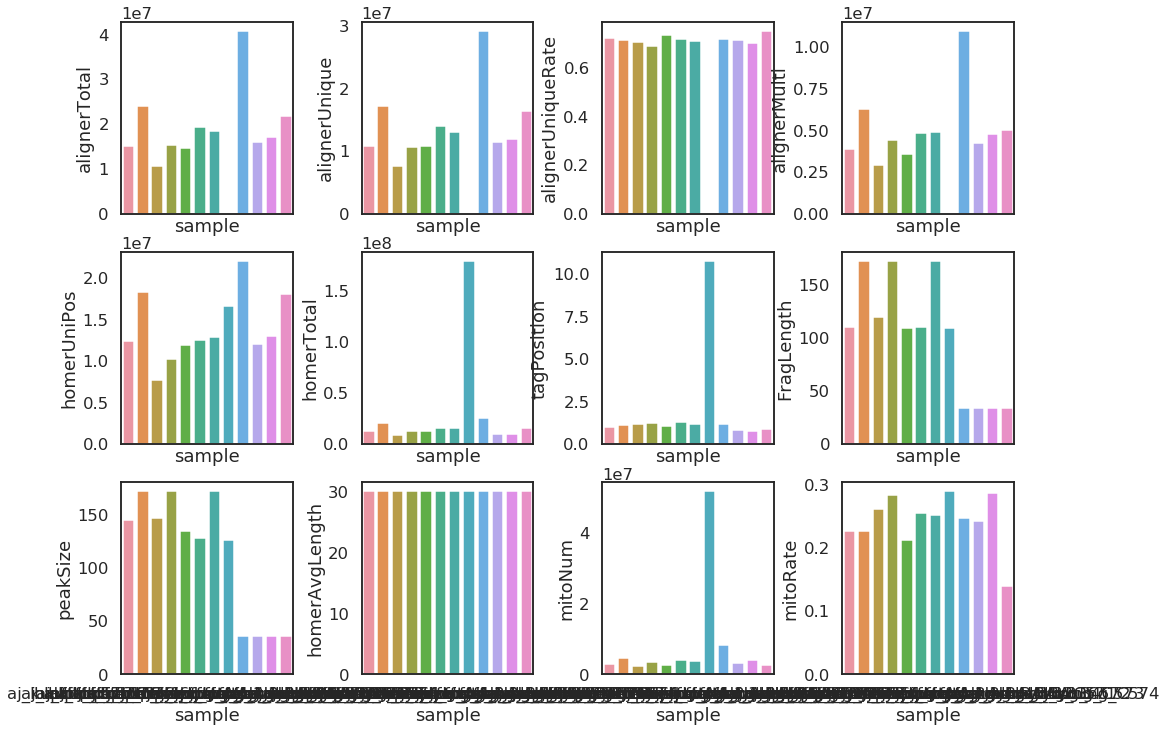

In [50]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12), sharex=True)
plt.subplots_adjust(wspace=0.4)

for col, ax in zip(qc.columns[1:], axs.flat):
    sns.barplot(x='sample', y=col, data=qc, ax=ax)

### Plot tag count distribution

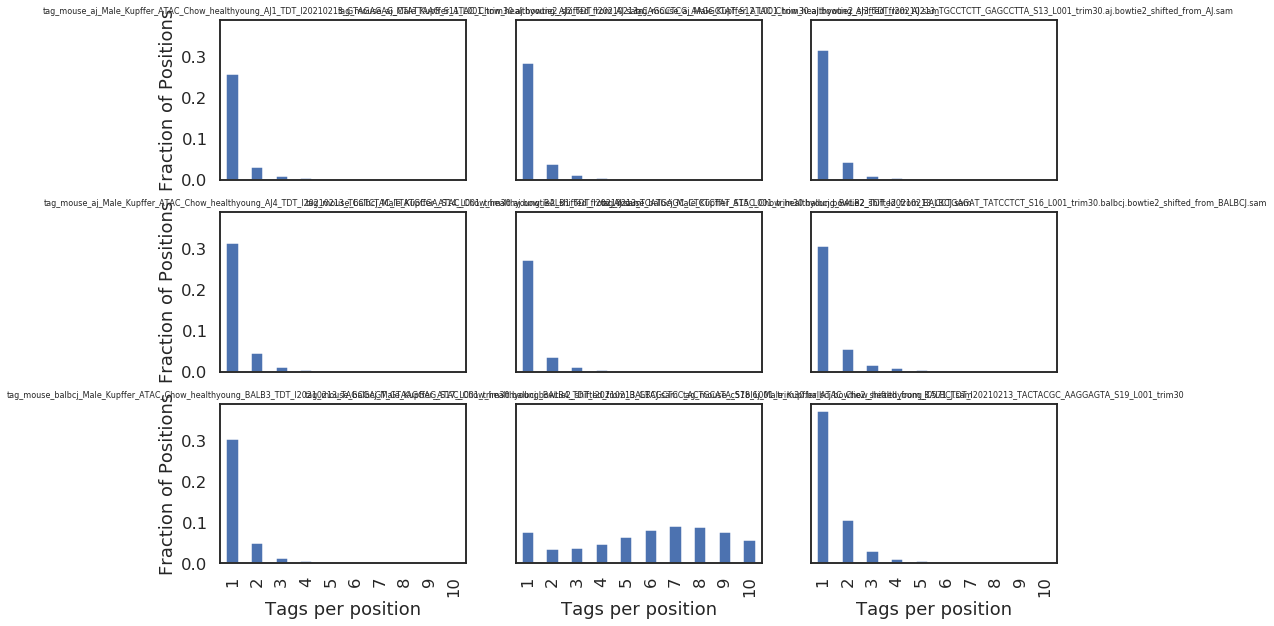

In [52]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(3,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

# Call Peaks

In [53]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./atac_peak_files/ ]; then mkdir ./atac_peak_files; fi

rm: cannot remove ‘./peakCalling_homer.sh’: No such file or directory


In [54]:
with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        find_peaks_idr = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-L', '0', '-C', '0', '-fdr', '0.9', '-style',
                          'factor', '-size', '200', '>',
                          workingDirectory + '/atac_peak_files/' + tagdir + '_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                      '-style', 'factor', '-size', '200', '>',
                      workingDirectory + '/atac_peak_files/' + tagdir + '_default_peaks.tsv',
                      '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_idr))
        f.write(' '.join(find_peaks))
f.close()

### compile peak stats for QC

In [60]:
peak_stats={}

for td in os.listdir('./atac_peak_files/'):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./atac_peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [61]:
df.sort_index(inplace=True)

### Save to file

In [62]:
df.loc[df.index.str.contains('default'), :].to_csv('./default_peak_table.txt', sep='\t')
df.loc[~df.index.str.contains('default'), :].to_csv('./idr_peak_table.txt', sep='\t')

In [63]:
df.loc[df.index.str.contains('default'), :]

,total_peaks,ip_eff,peaks_filt_input,peaks_filt_local,peaks_filt_clonal
.DS_Store_default_peaks.tsv,0.0,0.00,0.0,0.0,0.0
._.DS_Store_default_peaks.tsv,0.0,0.00,0.0,0.0,0.0
tag_mouse_aj_Male_Kupffer_ATAC_Chow_healthyoung_AJ1_TDT_l20210213_GTAGAGAG_CTATTAAG_S11_L001_trim30.aj.bowtie2_shifted_from_AJ.sam_default_peaks.tsv,48593.0,20.81,0.0,13555.0,30.0
tag_mouse_aj_Male_Kupffer_ATAC_Chow_healthyoung_AJ2_TDT_l20210213_CAGCCTCG_AAGGCTAT_S12_L001_trim30.aj.bowtie2_shifted_from_AJ.sam_default_peaks.tsv,51266.0,19.33,0.0,15610.0,45.0
tag_mouse_aj_Male_Kupffer_ATAC_Chow_healthyoung_AJ3_TDT_l20210213_TGCCTCTT_GAGCCTTA_S13_L001_trim30.aj.bowtie2_shifted_from_AJ.sam_default_peaks.tsv,46516.0,22.27,0.0,9922.0,28.0
tag_mouse_aj_Male_Kupffer_ATAC_Chow_healthyoung_AJ4_TDT_l20210213_TCCTCTAC_TTATGCGA_S14_L001_trim30.aj.bowtie2_shifted_from_AJ.sam_default_peaks.tsv,49621.0,21.50,0.0,10530.0,40.0
tag_mouse_balbcj_Male_Kupffer_ATAC_Chow_healthyoung_BALB1_TDT_l20210213_TCATGAGC_CTCTCTAT_S15_L001_trim30.balbcj.bowtie2_shifted_from_BALBCJ.sam_default_peaks.tsv,52567.0,24.05,0.0,13746.0,12.0
tag_mouse_balbcj_Male_Kupffer_ATAC_Chow_healthyoung_BALB2_TDT_l20210213_CCTGAGAT_TATCCTCT_S16_L001_trim30.balbcj.bowtie2_shifted_from_BALBCJ.sam_default_peaks.tsv,55095.0,26.91,0.0,14649.0,21.0
tag_mouse_balbcj_Male_Kupffer_ATAC_Chow_healthyoung_BALB3_TDT_l20210213_TAGCGAGT_GTAAGGAG_S17_L001_trim30.balbcj.bowtie2_shifted_from_BALBCJ.sam_default_peaks.tsv,50140.0,20.17,0.0,10901.0,23.0
tag_mouse_balbcj_Male_Kupffer_ATAC_Chow_healthyoung_BALB4_TDT_l20210213_GTAGCTCC_ACTGCATA_S18_L001_trim30.balbcj.bowtie2_shifted_from_BALBCJ.sam_default_peaks.tsv,158205.0,27.29,0.0,88465.0,45.0
